# Data Wrangling with Penguins

* The dataset contains several measurements (features) of 344 penguins across 3 antartic islands
* It contains a species designation (the label).
* It is frequently used for learning how to develop machine learning classification models.
* This Jupyter notebook contains data science work to analyze the data and train classification models.

![TestImage](img/penguins3.JPG)

### Data Science Project Samples
There are many sample data science projects to download from the internet.
These examples are based upon a couple of projects published in Kaggle at the links below.

* https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook
* https://www.kaggle.com/code/mohamedharris/how-to-classify-penguins-a-beginner-s-guide


### Step 1 Connect to Db2 z/OS and review the data

In [3]:
# pip install ipython-sql==0.4.1 ibm_db sqlalchemy==1.4.47 ibm_db_sa 

In [4]:
# and import them...

import sys,os,os.path
import os
path_1 = os.path.join('C:\\','Program Files','IBM','IBM DATA SERVER DRIVER','bin')
os.add_dll_directory(path_1)

import ibm_db 
import ibm_db_sa 
import sqlalchemy 

In [ ]:
# Now, lets take a look at the Penguins Dataset 
%load_ext sql
%sql ibm_db_sa://tsodcgm:passwd@10.3.58.61:448/RDBNDW00
%sql select * from zdw01.penguins fetch first 10 rows only


 * ibm_db_sa://tsodcgm:***@10.3.58.61:448/RDBNDW00
Done.


id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.1,18.7,181,3750,MALE
2,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
3,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
4,Adelie,Torgersen,None,None,None,None,None
5,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
6,Adelie,Torgersen,39.3,20.6,190,3650,MALE
7,Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
8,Adelie,Torgersen,39.2,19.6,195,4675,MALE
9,Adelie,Torgersen,34.1,18.1,193,3475,None
10,Adelie,Torgersen,42.0,20.2,190,4250,None


In [6]:
# A quick count of the data records by island, species and sex

%sql select island, species, sex, count(*) as count from zdw01.penguins group by island, species, sex order by island, species, sex

 * ibm_db_sa://tsodcgm:***@10.3.58.61:448/RDBNDW00
Done.


island,species,sex,COUNT
Biscoe,Adelie,FEMALE,22
Biscoe,Adelie,MALE,22
Biscoe,Gentoo,FEMALE,58
Biscoe,Gentoo,MALE,61
Biscoe,Gentoo,None,5
Dream,Adelie,FEMALE,27
Dream,Adelie,MALE,28
Dream,Adelie,None,1
Dream,Chinstrap,FEMALE,34
Dream,Chinstrap,MALE,34


### Step 2 Install and Import the standard data science tools you wish to use

* Libraries exist for many purposes (data access, mathematical tools, visualisation tools etc...)
* The libraries that you choose to use must be installed and imported into this python kernel (cw01 - top right).

In [7]:
# pip install pandas dcor numpy scikit-learn matplotlib seaborn pycountry plotly cufflinks folium nbformat chart_studio bar_chart_race

In [8]:
# import the libraries you want to use

import numpy as np 
import pandas as pd 
import dcor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
#!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart
#%pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

import nbformat 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
# import warnings
# warnings.filterwarnings('ignore')

### Step 3 Create and Populate a dataframe

* a DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
* It's conceptually the same as a Db2 table, but exists in the Python kernel for the data scientist to use

In [ ]:
# assign a variable that contains a string of your credentials
credentials = "ibm_db_sa://tsodcgm:passwd@10.3.58.61:448/RDBNDW00"

# read in your SQL query results using pandas
dataframe = pd.read_sql("""
            select species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex 
            from zdw01.penguins
            ORDER BY id
            """, con = credentials)

# and save the original
original = dataframe.copy() 

# return your first ten rows
dataframe.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,None
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,None
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,None


In [10]:
# Understand the fields in the dataframe

dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
# Calculate some numercial average and distribution data

dataframe.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### Step 4 Start "Data Wrangling" with pandas

Data Wrangling consists of 5 main activity areas:

1. Data exploration — feature values, ranges, correlations, relationships...
2. Dealing with missing values — various strategies
3. Reshaping data — pivot tables, joins, grouping and aggregating
4. Filtering data - selection, projection etc...
5. Other — Making descriptive columns, element-wise conditional operations

In [12]:
# Count the number of each species in the labelled dataset

df_counts = dataframe['species'].value_counts()
df_counts.head()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='species'>

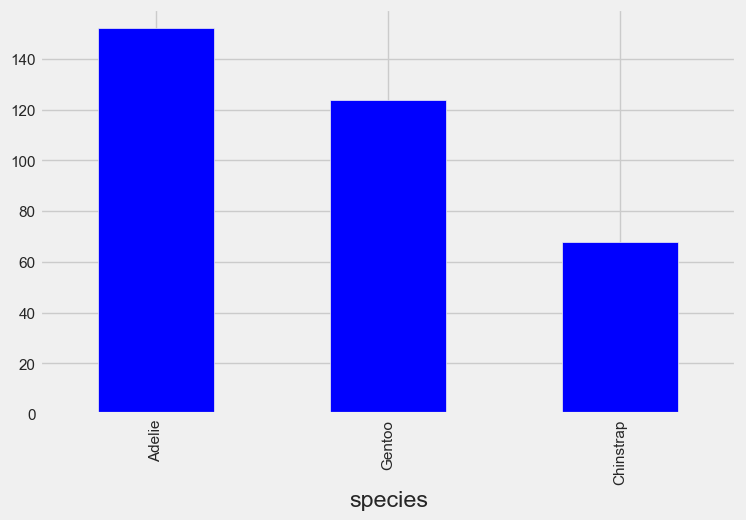

In [13]:
# or represent the counts graphically

#dataframe['species'].value_counts().iplot(kind='bar')
df_counts.plot(kind ='bar',color='blue')

<Axes: >

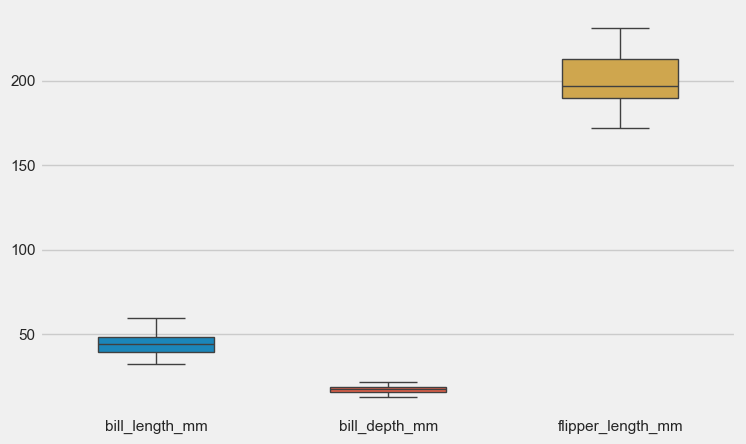

In [14]:
# Create a filtered dataframe for exploring ranges of data values for different species of penguin

df1 = dataframe[['species', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

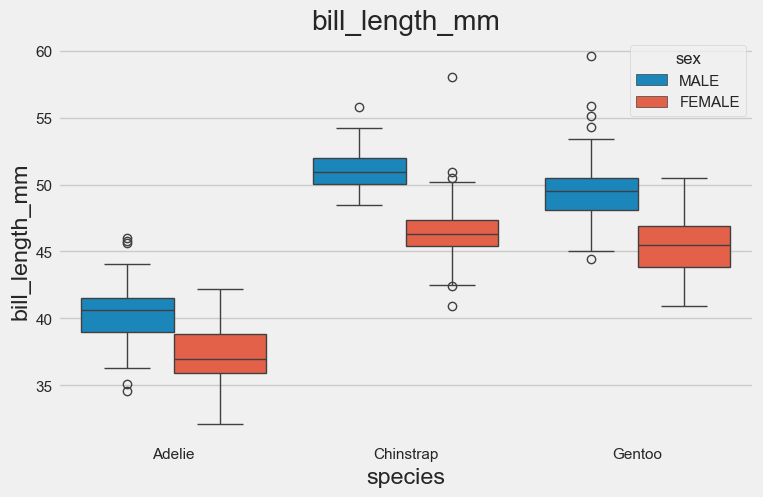

In [15]:
# Now, focus on bill length by species and sex.

def box(f):
    sns.boxplot(y = f, x = 'species', hue = 'sex',data = dataframe)
    plt.title(f)
    plt.show() 

box('bill_length_mm')

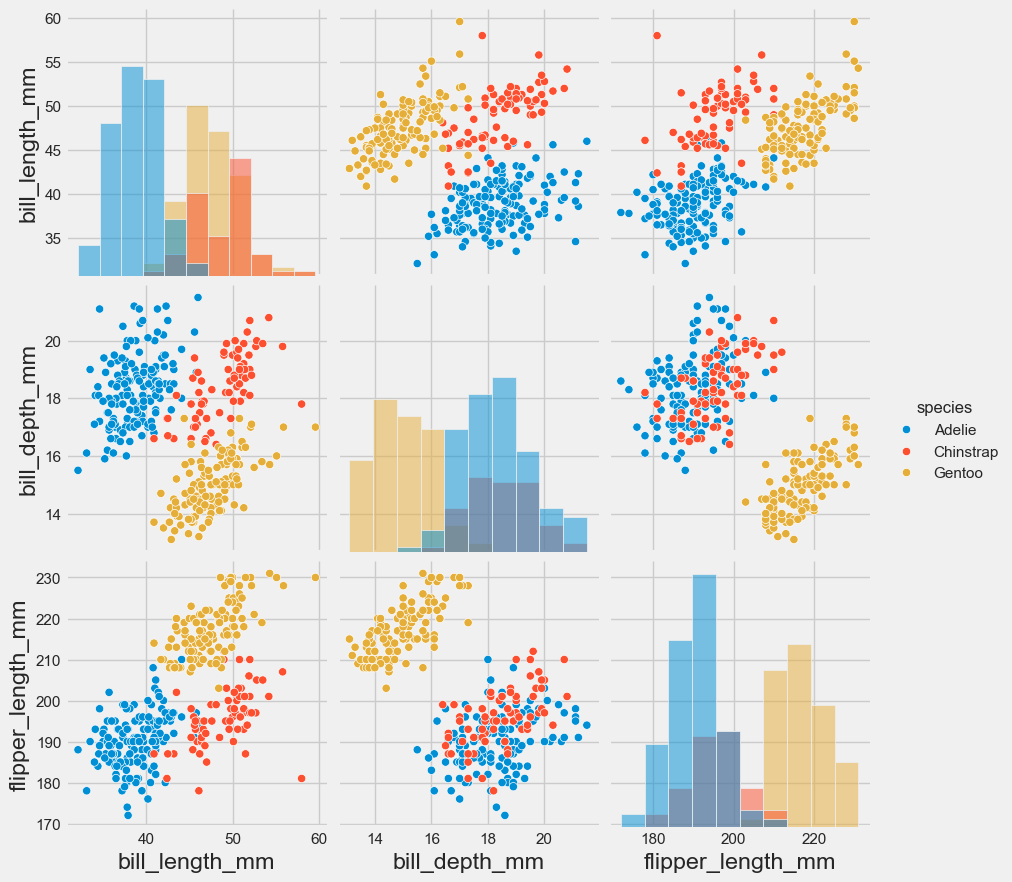

In [16]:
# Each of the features are helpful in differentiating between species. Combining multiple features can expose stronger data patterns.

sns.pairplot(df1, hue="species", height=3,diag_kind="hist")

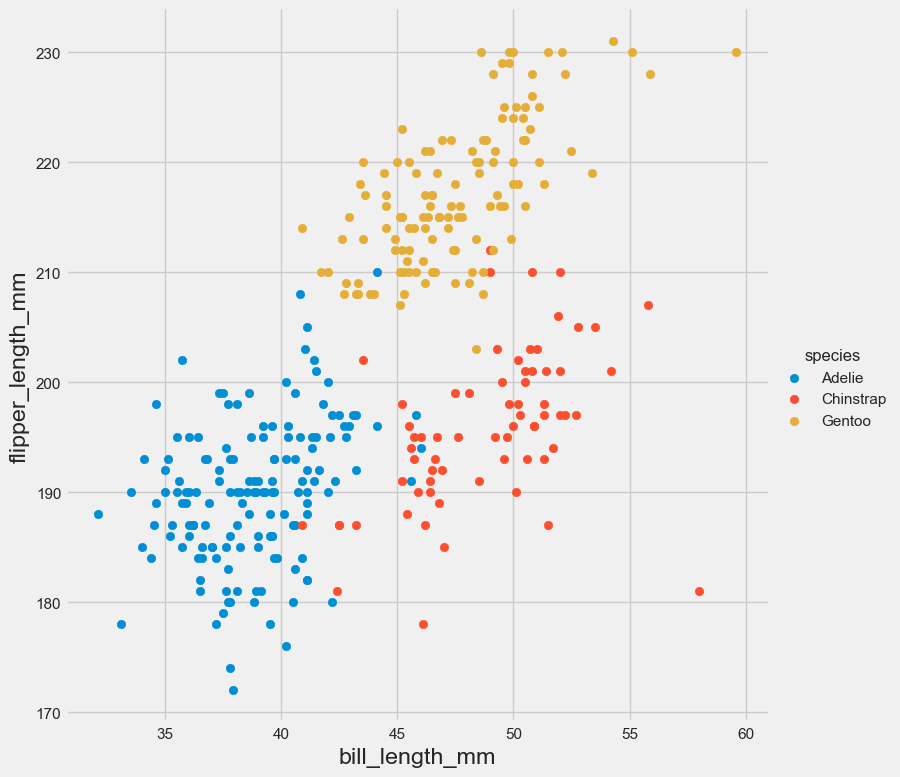

In [17]:
# we can zoom in on particular pairplots

sns.FacetGrid(df1, hue="species", height=8) \
   .map(plt.scatter, "bill_length_mm", "flipper_length_mm") \
   .add_legend()

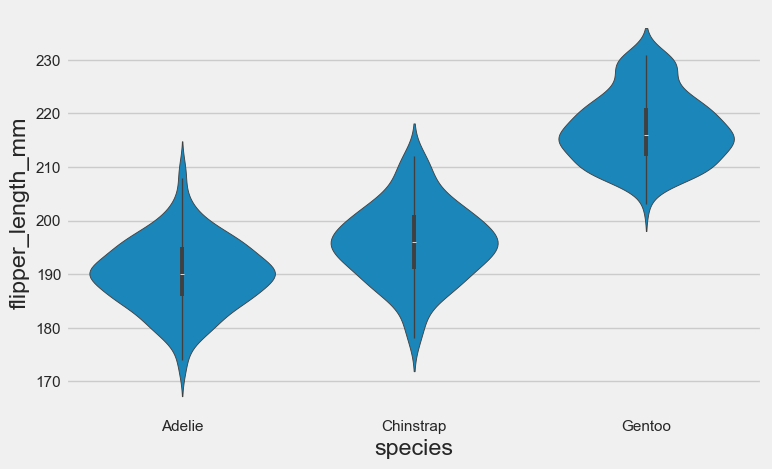

In [18]:
# another visualisation tool is the violin plot

ax = sns.violinplot(x="species", y="flipper_length_mm", data=df1)

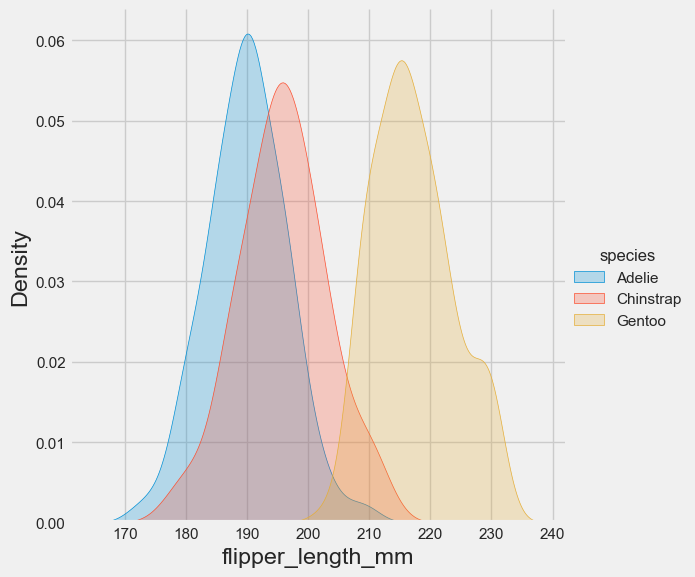

In [19]:
# and we can plot distribution curves

sns.FacetGrid(df1, hue="species", height=6,) \
   .map(sns.kdeplot, "flipper_length_mm",fill=True) \
   .add_legend()

### Step 5 : Cleaning the Data

The previous section showed a very small subset of data wrangling techniques to allow the data scientist to understand the dataset, see patterns in the data, and start to form ideas about which model types may be best suited to the task of creating a classification model.

Before fitting and training a model, a data pipeline should be built to cleanse and transform the data into a suitable form. Data cleansing work may include
* identifying null or empty values, and deciding on a technique to handle them
* eliminating data features that don't have a big impact on the classification of records
* converting string datatypes into numerical types
* Normalising the data values into ranges with good distribution of values
etc...

In [20]:
# Import the libraries for 5 model types

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [21]:
# Eyeball the first 10 rows. We can see nulls and missing values.

dataframe.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,None
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,None
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,None


In [22]:
# Check the counts of Null values

dataframe.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [23]:
# Create a new dataframe and choose statistical means for missing values
# in the example below we just choose the statistical mean value for the 4 measurement data features, and the modal value for sex data feature.

new_df = original.copy()

new_df['bill_length_mm'].fillna(np.mean(original['bill_length_mm']), inplace = True)
new_df['bill_depth_mm'].fillna(np.mean(original['bill_depth_mm']), inplace = True)
new_df['flipper_length_mm'].fillna(np.mean(original['flipper_length_mm']), inplace = True)
new_df['body_mass_g'].fillna(np.mean(original['body_mass_g']), inplace = True)
new_df['sex'].fillna(original['sex'].mode()[0], inplace = True)

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_2920\2716637933.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_2920\2716637933.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [24]:
# Verify that we have assigned values to all the missing data features

new_df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
5,Adelie,Torgersen,39.30000,20.60000,190.000000,3650.000000,MALE
6,Adelie,Torgersen,38.90000,17.80000,181.000000,3625.000000,FEMALE
7,Adelie,Torgersen,39.20000,19.60000,195.000000,4675.000000,MALE
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,MALE
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,MALE


In [25]:
# and check that the null values are missing

new_df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [26]:
# skewness is a statistical measure of asymmetry from a normal distribution. Skewness between -0.5 and +0.5 is considered symmetrical.
# this dataset does not suffer from skewing

print('Skewness of numeric variables')
print('-' * 35)

for i in new_df.select_dtypes(['int64', 'float64']).columns.tolist():
    print(i, ' : ',new_df[i].skew())

Skewness of numeric variables
-----------------------------------
bill_length_mm  :  0.053271788831634054
bill_depth_mm  :  -0.1438798068350749
flipper_length_mm  :  0.34668222408256033
body_mass_g  :  0.47169044722118986


In [27]:
# Now take a look at the range of actual values for the data features.new_df

new_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [28]:
# the goal of data normalization is to ensure that data is similar across all records, to make the model more efficient
# The function below is used to normalse the numerical data features between the values of -1 and +1.
# See how it compresses the data values. (aka "squishification")

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

new_df['bill_length_mm'] = mms.fit_transform(new_df['bill_length_mm'].values.reshape(-1, 1))
new_df['bill_depth_mm'] = mms.fit_transform(new_df['bill_depth_mm'].values.reshape(-1, 1))
new_df['flipper_length_mm'] = mms.fit_transform(new_df['flipper_length_mm'].values.reshape(-1, 1))
new_df['body_mass_g'] = mms.fit_transform(new_df['body_mass_g'].values.reshape(-1, 1))
new_df['sex'].fillna(original['sex'].mode()[0], inplace = True)

new_df.describe()

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_2920\2175032419.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,0.429888,0.482282,0.490088,0.417154
std,0.197951,0.234408,0.237638,0.222115
min,0.000000,0.000000,0.000000,0.000000
25%,0.260909,0.297619,0.305085,0.236111
50%,0.441818,0.500000,0.423729,0.375000
75%,0.596364,0.666667,0.694915,0.569444
max,1.000000,1.000000,1.000000,1.000000


In [29]:
new_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,MALE
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,FEMALE
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,FEMALE
3,Adelie,Torgersen,0.429888,0.482282,0.490088,0.417154,MALE
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,FEMALE


In [30]:
# Now lets create dummy values for sex and island fields

new_df_dummy = pd.get_dummies(new_df, columns = ['sex', 'island'], drop_first = True) 

new_df_dummy.head(10)




,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,island_Dream,island_Torgersen
0,Adelie,0.254545,0.666667,0.152542,0.291667,True,False,True
1,Adelie,0.269091,0.511905,0.237288,0.305556,False,False,True
2,Adelie,0.298182,0.583333,0.389831,0.152778,False,False,True
3,Adelie,0.429888,0.482282,0.490088,0.417154,True,False,True
4,Adelie,0.167273,0.738095,0.355932,0.208333,False,False,True
5,Adelie,0.261818,0.892857,0.305085,0.263889,True,False,True
6,Adelie,0.247273,0.559524,0.152542,0.256944,False,False,True
7,Adelie,0.258182,0.773810,0.389831,0.548611,True,False,True
8,Adelie,0.072727,0.595238,0.355932,0.215278,True,False,True
9,Adelie,0.360000,0.845238,0.305085,0.430556,True,False,True


In [31]:
# Now lets assign numerical values for the 3 species. First we check the unique text values that exist.

new_df_dummy['species'].unique()
new_df_dummy['species'] = new_df_dummy['species'].astype('category')
new_df_dummy.dtypes

species              category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex_MALE                 bool
island_Dream             bool
island_Torgersen         bool
dtype: object

In [39]:
#Next, we replace those values with numerical surrogate values.

#new_df_dummy['species'].replace(['Adelie                        ',
#                                  'Chinstrap                     ',
#                                    'Gentoo                        '],
#                                     [0, 1, 2], inplace = True)

catcolums = new_df_dummy.select_dtypes(['category']).columns
catcolums
new_df_dummy[catcolums] = new_df_dummy[catcolums].apply(lambda x: x.cat.codes)
new_df_dummy


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,island_Dream,island_Torgersen
0,0,0.254545,0.666667,0.152542,0.291667,True,False,True
1,0,0.269091,0.511905,0.237288,0.305556,False,False,True
2,0,0.298182,0.583333,0.389831,0.152778,False,False,True
3,0,0.429888,0.482282,0.490088,0.417154,True,False,True
4,0,0.167273,0.738095,0.355932,0.208333,False,False,True
...,...,...,...,...,...,...,...,...
339,2,0.429888,0.482282,0.490088,0.417154,True,False,False
340,2,0.534545,0.142857,0.728814,0.597222,False,False,False
341,2,0.665455,0.309524,0.847458,0.847222,True,False,False
342,2,0.476364,0.202381,0.677966,0.694444,False,False,False


<Axes: >

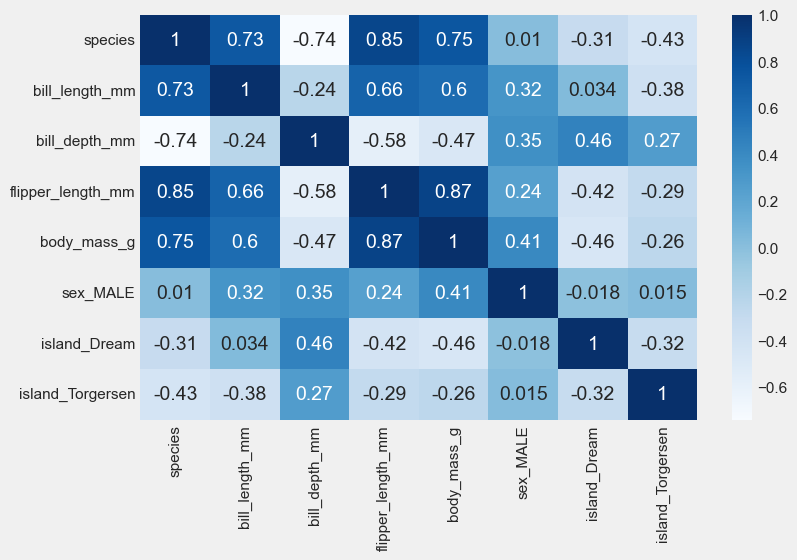

In [40]:
sns.heatmap(new_df_dummy.corr(), annot = True, cmap = 'Blues')



In [35]:
# Create 2 sets of data, with and without the label

X = new_df_dummy.drop(columns = ['species'])
Y = new_df_dummy['species']

In [36]:
# Split the Data 75% training and 25% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

In [37]:
# Try with a Logical Regression Model

LR = LogisticRegression()
LR.fit(X_train, Y_train)

pred = LR.predict(X_test)

In [38]:
# Check the Accuracy and F1 Score of the trained model

print('Accuracy : ', accuracy_score(Y_test, pred))
print('F1 Score : ', f1_score(Y_test, pred, average = 'weighted')) 
print('Precision : ', precision_score(Y_test, pred , average = 'weighted'))
print('Recall : ', recall_score(Y_test, pred, average = 'weighted'))

Accuracy :  1.0
F1 Score :  1.0
Precision :  1.0
Recall :  1.0


In [39]:
# Try some other candidate models 

models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))